In [2]:
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.image as img
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

## **read dataset**

In [3]:
#read path
path = pathlib.Path("C:\\Users\\Rawan\\Desktop\\Route AI\\cell_images")


In [4]:
#read two folders
Parasitized = list(path.glob('Parasitized/*'))
Uninfected = list(path.glob('Uninfected/*'))

In [5]:
data = {
    'Parasitized' : Parasitized,
    'Uninfected' :Uninfected
}

data_labels = {
    0: 'Parasitized',
    1: 'Uninfected'
}

## **visualization images**

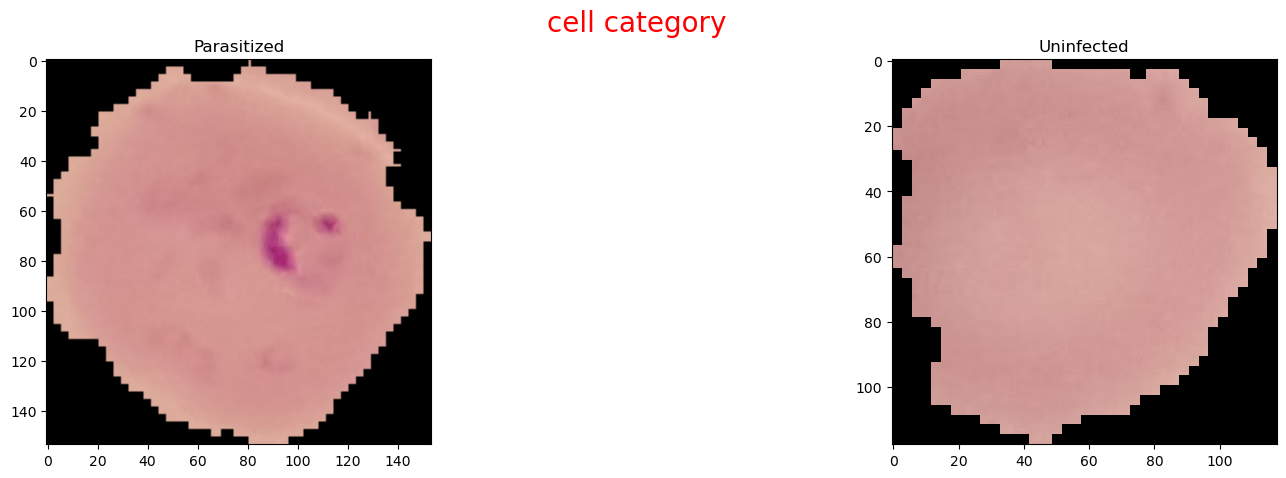

In [9]:

fig,ax = plt.subplots(ncols = 2, figsize = (20,5))
fig.suptitle("cell category", color = 'red', fontsize = 20)

Parasitized_img = img.imread(Parasitized[10])
Uninfected_img = img.imread(Uninfected[5])

for index, name in enumerate(list(data.keys())):
    ax[index].set_title(name)

ax[0].imshow(Parasitized_img)
ax[1].imshow(Uninfected_img)

## **data augmentation**

In [10]:
#define augmentation
data_aug = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)

In [11]:
#train data
train_data = data_aug.flow_from_directory(
    directory = 'C:\\Users\\Rawan\\Desktop\\Route AI\\cell_images',
    target_size = (128,128),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'training'
)

Found 22048 images belonging to 2 classes.


In [12]:
#test data
test_data = data_aug.flow_from_directory(
    directory = 'C:\\Users\\Rawan\\Desktop\\Route AI\\cell_images',
    target_size = (128,128),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'validation'
)

Found 5510 images belonging to 2 classes.


## **model building**

In [13]:
#model building
cnn_model = Sequential()

#add layers
cnn_model.add(Conv2D(filters = 32, kernel_size = 3,
                     padding = 'same',
                     activation = 'relu', input_shape = [128,128,3]))

cnn_model.add(MaxPooling2D(pool_size= (2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3,
                     padding = 'same',
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())

#flatten layer
cnn_model.add(Flatten())

#fully connected cnn
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(1, activation = 'sigmoid'))

## **compile model**

In [14]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

## **fit model**

In [15]:
model_history = cnn_model.fit(train_data,
                             epochs = 5,
                             validation_data = test_data,
                             )

Epoch 1/5
1378/1378 [==============================] - 348s 251ms/step - loss: 0.4020 - accuracy: 0.8139 - val_loss: 0.2152 - val_accuracy: 0.9265
Epoch 2/5
1378/1378 [==============================] - 355s 258ms/step - loss: 0.2025 - accuracy: 0.9349 - val_loss: 0.2439 - val_accuracy: 0.9223
Epoch 3/5
1378/1378 [==============================] - 364s 264ms/step - loss: 0.1481 - accuracy: 0.9500 - val_loss: 0.1940 - val_accuracy: 0.9316
Epoch 4/5
1378/1378 [==============================] - 365s 265ms/step - loss: 0.1047 - accuracy: 0.9654 - val_loss: 0.2327 - val_accuracy: 0.9214
Epoch 5/5
1378/1378 [==============================] - 346s 251ms/step - loss: 0.0675 - accuracy: 0.9779 - val_loss: 0.3182 - val_accuracy: 0.9212


## **plotting**

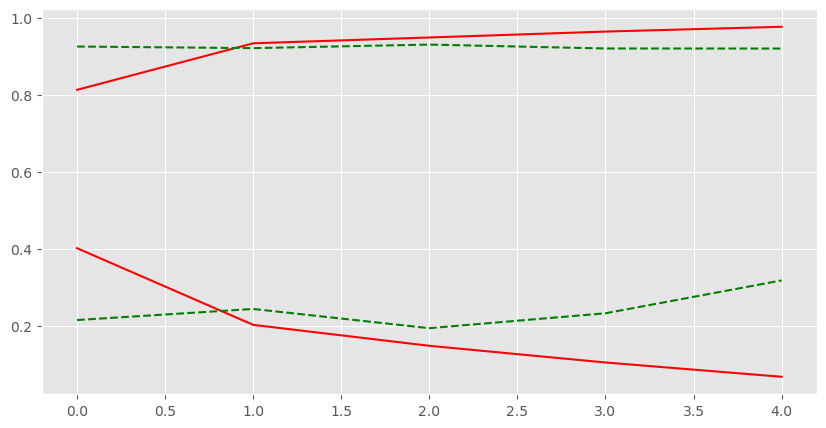

In [19]:
#plot error and accuracy
h = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

plt.plot(h['loss'], c = 'red', label = 'training loss')
plt.plot(h['val_loss'], c = 'green', label = 'validation loss', linestyle = '--')

plt.plot(h['accuracy'], c = 'red', label = 'training accuracy')
plt.plot(h['val_accuracy'], c = 'green', label = 'training loss', linestyle = '--')

## **test & train accuracy**

In [20]:
cnn_model.evaluate(test_data)

345/345 [==============================] - 13s 38ms/step - loss: 0.3182 - accuracy: 0.9212


[0.3181638717651367, 0.921234130859375]

## **predict on new image**

In [21]:
testing_image = 'C:/Users/Rawan/Desktop/Route AI/cell_images/Parasitized/C145P106ThinF_IMG_20151016_154756_cell_116.png'

In [22]:
class_map = dict([v,k] for k,v in train_data.class_indices.items())
class_map

{0: 'Parasitized', 1: 'Uninfected'}

In [23]:
import numpy as np
from PIL import Image
from keras.preprocessing import image

def predictions(testing_image, actual_label):

    #load and preprocessing image
    test_img = image.load_img(testing_image, target_size = (128,128))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))

    #make prediction
    predicted_label = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_label]


    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')

1/1 [==============================] - 0s 82ms/step


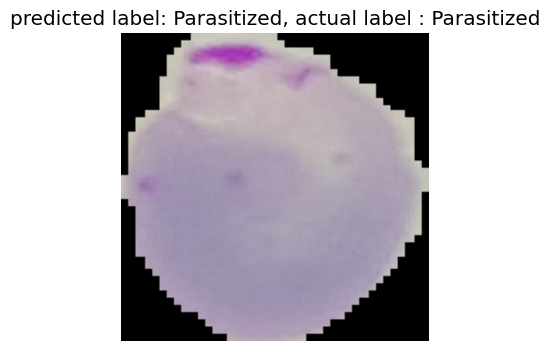

In [24]:
predictions(testing_image, actual_label = 'Parasitized')